Hamilton's equation:
q'  =  p
p'  =  -1/q**2


-0.04

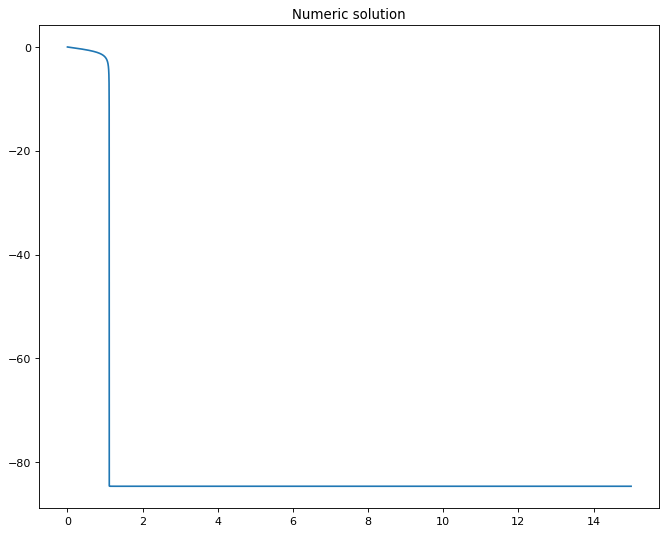

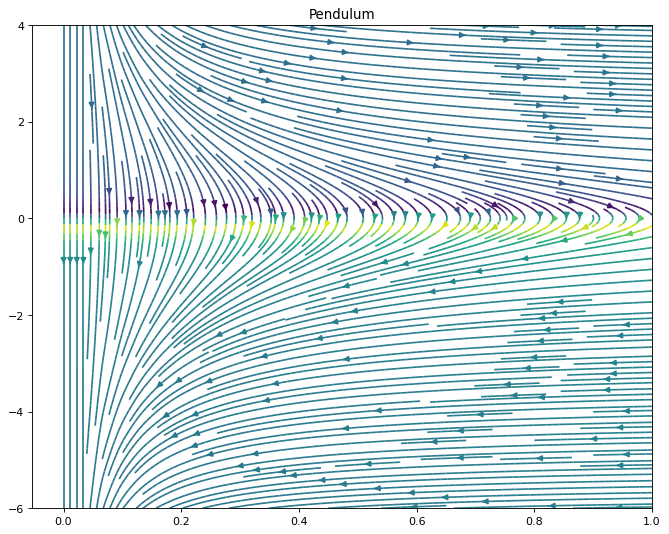

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy.solvers.ode.systems import dsolve_system

#The following lib is used to print equation's solutions in a better form
from IPython.display import display, Latex

#Here we define the symbols we are gonna use for the Hamiltonian H. We are using natural units, too.
p, q = sp.symbols('p q')
H = p**2/2 - 1/q

x,y = np.meshgrid(np.linspace(0.000001,1,30), np.linspace(-6,4,30))

#We print Hamilton's equations
print('Hamilton\'s equation:')
print('q\'  = ', sp.diff(H, p)) 
print('p\'  = ', -sp.diff(H, q))

#Here we "transform", using lambdify function, symbols into array to be used in streamplot 
pdot = sp.lambdify(q, -sp.diff(H, q), 'numpy')
qdot = sp.lambdify(p, sp.diff(H, p), 'numpy')


#Hamiltonian field
u = qdot(y)
v = pdot(x)

#Solving equations
t = sp.symbols('t')
f = sp.Function('q')  
g = sp.Function('p')

#Initial parameters
x0 = 0
v0 = 1
xf = 15
ics0 = {f(0): x0, g(0): v0}

def check_sys():
    
#Check if the system is solvable...
    try:
        eqs = [sp.Eq(f(t).diff(t), sp.diff(H, p).subs(p, g(t))), sp.Eq(g(t).diff(t), -sp.diff(H, q).subs(q, f(t)))]
        a = dsolve_system(eqs, ics = ics0)

    except NotImplementedError:
        return 0

    else:
        return a

    
#Numeric Integrator
if check_sys() == 0:
    num_steps = 10000
    dt = xf/num_steps

    xs1 = np.zeros(num_steps + 1)
    vs1 = np.zeros(num_steps + 1)
    ts1 = np.zeros(num_steps + 1)

    xs1[0], vs1[0]=(x0, v0)

    for i in range(num_steps):
        vs1[i + 1] = vs1[i] + dt*qdot(xs1[i])
        xs1[i + 1] = xs1[i] + dt*pdot(vs1[i+1])
        ts1[i + 1] = ts1[i] + dt
    plt.figure(1, figsize=(10, 8), dpi=80)
    plt.plot(ts1, xs1)
    plt.title('Numeric solution')


else:
    display(check_sys())


#This is used to produce the fading in the color
E = sp.lambdify([p, q], H, 'numpy')

plt.figure(2, figsize=(10, 8), dpi=80)
plt.streamplot(x,y,u,v, color = E(x, y), cmap = 'viridis', density = 3)
plt.title('Pendulum')
#plt.savefig('Pendulum.pdf')
plt.show()